In [1]:
import scipy.optimize as so
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import math

# One-dimensional methods

## Define target functions

In [2]:
def f1(x):
    return x**3
    
def f2(x):
    return np.abs(x-0.2)

def f3(x):
    return x*np.sin(1/x)

## Function for plotting and optimizing data 

In [3]:
def time_and_plot(opt_f, f, range_, tol=0.001):
    start_time = time.time()
   
    esbrute, it = opt_f(f, range_, tol)
    print(f"Found min x={esbrute} with {it} iterations")
    print(f"Took {time.time() - start_time} sec")
    t = np.arange(0.0, 2.0, 0.01)
    s = f(t)

    fig, ax = plt.subplots()
    ax.plot(t, s,label='Function')
    ax.plot(esbrute,0,'ro',label='Found min x')
    ax.legend()
    ax.set(xlabel='x', ylabel='y',
           title='f')
    ax.grid()
    plt.show()


## Exhaustive search function 

In [4]:
def exhaustive(f, range_, tol):
    a,b = range_
    n = int((b-a)/tol)
    min_f = None
    min_x = None
    for k in range(n):
        x = a + k*(b-a)/n
        fx = f(x)
        if not min_x or fx<min_f:
            min_f = fx
            min_x = x

    return min_x, k

## Results for exhaustive search method

Found min x=0.001 with 999 iterations
Took 0.00045371055603027344 sec


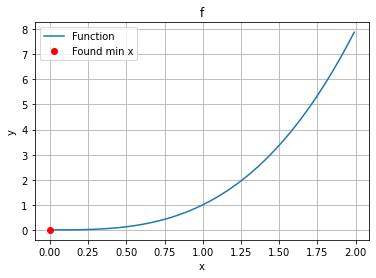

Found min x=0.2 with 999 iterations
Took 0.0008523464202880859 sec


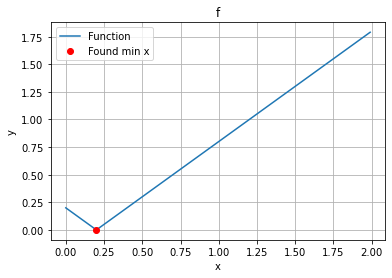

Found min x=0.223 with 989 iterations
Took 0.0010106563568115234 sec


<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


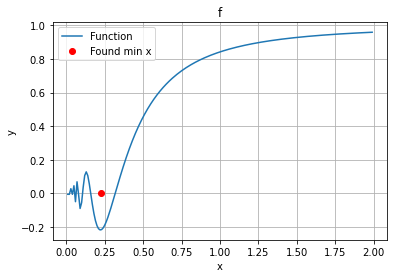

In [5]:
time_and_plot(exhaustive, f1, (0,1))
time_and_plot(exhaustive, f2, (0,1))
time_and_plot(exhaustive, f3, (0.01,1))

## Dichotomy method function

In [6]:
def dichotomy(f, range_, tol):
    delta=tol/2
    a,b = range_
    iter_count = 0

    while abs(a-b)>=tol:
        iter_count += 1
        x1 = (a+b-delta)/2
        x2 = (a+b+delta)/2
        fx1 = f(x1)
        fx2 = f(x2)
        a = a  if fx1<=fx2 else x1
        b = x2 if fx1<=fx2 else b
    return abs(a+b)/2, iter_count

Found min x=0.0004940185546875001 with 11 iterations
Took 6.341934204101562e-05 sec


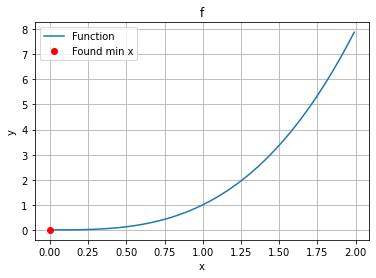

Found min x=0.20010119628906245 with 11 iterations
Took 5.793571472167969e-05 sec


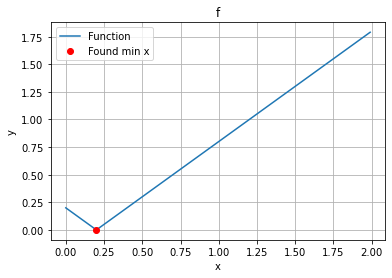

Found min x=0.22259631347656245 with 11 iterations
Took 6.175041198730469e-05 sec


<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


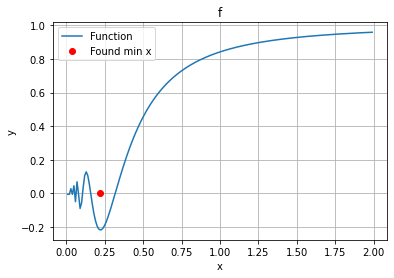

In [7]:
time_and_plot(dichotomy, f1, (0,1))
time_and_plot(dichotomy, f2, (0,1))
time_and_plot(dichotomy, f3, (0.01,1))

## Golden section function

In [8]:
def golden(f, range_, tol):
    ratio = (1 + math.sqrt(5))/2
    resphi = 2 - ratio
    iter_count = 0
    def golden_section(f, a, c, b, tol):
        nonlocal iter_count
        iter_count+=1
        if abs(a - b) <= tol:
            return (a + b)/2
        
        d = c + resphi*(b - c)
        if f(d) <= f(c):
            return golden_section(f, c, d, b, tol)
        else:
            return golden_section(f, c, d, a, tol)

    return golden_section(f, range_[0], (-1 + resphi*2), range_[1], tol), iter_count

Found min x=0.00036656871792870255 with 15 iterations
Took 7.557868957519531e-05 sec


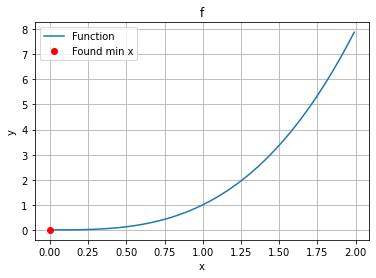

Found min x=0.19998677860772957 with 27 iterations
Took 8.869171142578125e-05 sec


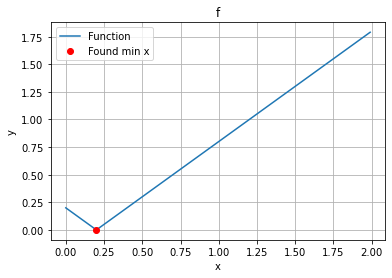

Found min x=0.22245925614958 with 27 iterations
Took 9.584426879882812e-05 sec


<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: divide by zero encountered in true_divide
  return x*np.sin(1/x)
<ipython-input-2-426d29ca77a2>:8: RuntimeWarning: invalid value encountered in sin
  return x*np.sin(1/x)


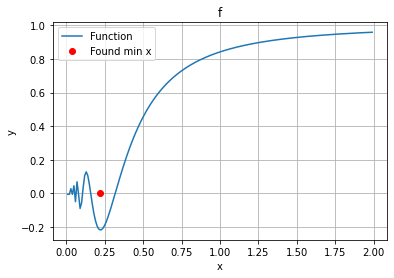

In [9]:
time_and_plot(golden, f1, (0,1))
time_and_plot(golden, f2, (0,1))
time_and_plot(golden, f3, (0.01,1))

# Multi-dimensional methods

## Define goal function

In [10]:
alpha = random.random()
beta  = random.random()
k = 100
mu, sigma = 0, 0.1 # mean and standard deviation
s = list(np.random.normal(mu, sigma, k))
x_k = list(range(100))
y_k = list(map(lambda x,delta: alpha*(x/k) + beta + delta, 
                   x_k, s))

## Plot goal function

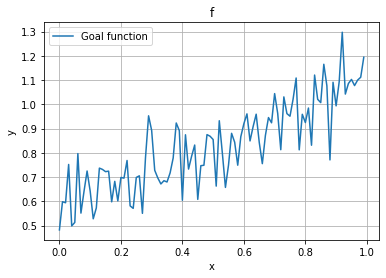

In [11]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()
plt.show()


## Define minimization function

## Linear

In [12]:
def linear(params):
    x = np.linspace(0,1,100)
    a,b = params
    return a*x-b

def D_l(x, y_k):
    res = (linear(x)-y_k)**2
    return np.sum(res)

## Nelder-mead method

In [13]:
start_time = time.time()
res = so.minimize(D_l, x0=np.zeros(shape=(2,)), args=y_k, 
                  method='Nelder-Mead')
print(f"Found sol a={res.x[0]} and b={res.x[1]} in {time.time()-start_time} sec")

Found sol a=0.5185398947059175 and b=-0.5676890561381985 in 0.010587692260742188 sec


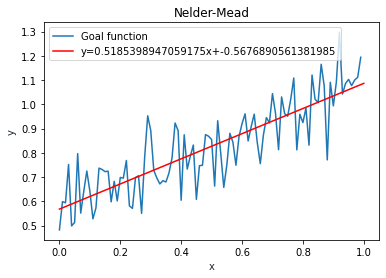

In [14]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()


x = np.linspace(0,1,100)
y = res.x[0]*x-res.x[1]
plt.plot(x, y, '-r', label=f'y={res.x[0]}x+{res.x[1]}')
plt.title('Nelder-Mead')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Rational

In [15]:
def rational(params):
    x = np.linspace(0,1,100)
    a,b = params
    return a/(1+b*x)

def D_r(x, y_k):
    res = (rational(x)-y_k)**2
    return np.sum(res)

In [16]:
start_time = time.time()
res = so.minimize(D_r, x0=np.zeros(shape=(2,)), args=y_k, 
                  method='Nelder-Mead')
print(f"Found sol a={res.x[0]} and b={res.x[1]} in {time.time()-start_time} sec")

Found sol a=0.6149271806389708 and b=-0.4641415184107654 in 0.010002851486206055 sec


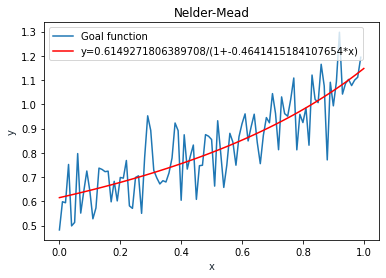

In [17]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()


x = np.linspace(0,1,100)
y = res.x[0]/(1+res.x[1]*x)
plt.plot(x, y, '-r', label=f'y={res.x[0]}/(1+{res.x[1]}*x)')
plt.title('Nelder-Mead')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Exhaustive search

In [18]:
def exhaustive_two(f, range_, tol, y_k):
    a_a,b_a = range_
    a_b,b_b = range_
    n = int((b_a-a_a)/tol)
    
    min_f = None
    min_x = None
    
    for i in range(n):
        for j in range(n):
            x1 = a_a + i*(b_a-a_a)/n
            x2 = a_b + j*(b_b-a_b)/n
            x=[x1,x2]
            fx = f(x, y_k)
            if not min_x or fx<min_f:
                min_f = fx
                min_x = x
    return min_x, k

## Linear

In [19]:
start_time = time.time()
res = exhaustive_two(D_l, [-1.0,1.0], 0.01,y_k)
print(f"Found sol a={res[0]} and b={res[1]} in {time.time()-start_time} sec")

Found sol a=[0.52, -0.5700000000000001] and b=100 in 1.7336344718933105 sec


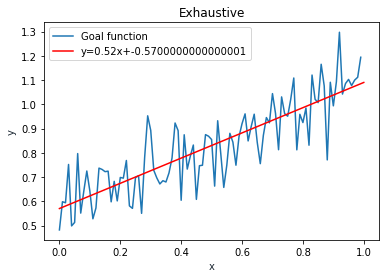

In [20]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()


x = np.linspace(0,1,100)
y = res[0][0]*x-res[0][1]
plt.plot(x, y, '-r', label=f'y={res[0][0]}x+{res[0][1]}')
plt.title('Exhaustive')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Rational

In [21]:
start_time = time.time()
res = exhaustive_two(D_r, [-1.0,1.0], 0.01,y_k)
print(f"Found sol a={res[0][0]} and b={res[0][1]} in {time.time()-start_time} sec")

<ipython-input-15-f54f7e5c79e5>:4: RuntimeWarning: divide by zero encountered in true_divide
  return a/(1+b*x)
<ipython-input-15-f54f7e5c79e5>:4: RuntimeWarning: invalid value encountered in true_divide
  return a/(1+b*x)


Found sol a=0.6100000000000001 and b=-0.47 in 1.9220991134643555 sec


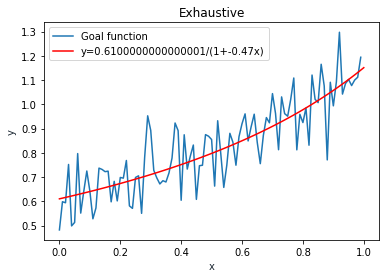

In [22]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()


x = np.linspace(0,1,100)
y = res[0][0]/(1+res[0][1]*x)
plt.plot(x, y, '-r', label=f'y={res[0][0]}/(1+{res[0][1]}x)')
plt.title('Exhaustive')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Gauss search

In [23]:
def make_D(f, y_k, a=None,b=None):
    if a:
        return lambda x: f([a,x],y_k)
    return lambda x: f([x,b], y_k)

#We will use dichotomy method for optimizing single variable optimization
def gauss(f, tol, y_k):
    # Inital guess
    x = [-5,-5]
    iter_count = 0
    x_prev = None
    even = False

    
    while not x_prev or (abs(x[0]-x_prev[0])+abs(x[1]-x_prev[1]))>=tol:

        D = make_D(f, y_k,a=x[0]) if even else make_D(f, y_k,b=x[1])
        
        res = exhaustive(D,[-2,1],tol)
        prev_res = res
        iter_count += res[1]
        x_prev = x
        x = [x[0],res[0]] if even else [res[0],x[1]]
        even = not even
    return x, iter_count

## Linear

In [24]:
start_time = time.time()
res = gauss(D_l,0.011,y_k)
print(f"Found sol a={res[0][0]} and b={res[0][1]} in {time.time()-start_time} sec and {res[1]} iterations")

Found sol a=0.5036764705882355 and b=-0.5772058823529411 in 0.39676737785339355 sec and 8672 iterations


[0.5036764705882355, -0.5772058823529411]


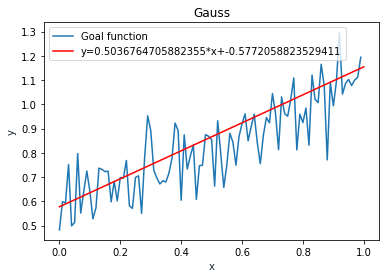

In [25]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()

print(res[0])
x = np.linspace(0,1,100)
y = linear([-res[0][1], res[0][1]])
plt.plot(x, y, '-r', label=f'y={res[0][0]}*x+{res[0][1]}')
plt.title('Gauss')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Rational

In [26]:
start_time = time.time()
res = gauss(D_r,0.01,y_k)
print(f"Found sol a={res[0][0]} and b={res[0][1]} in {time.time()-start_time} sec and {res[1]} iterations")

Found sol a=0.6600000000000001 and b=-0.3899999999999999 in 0.2442615032196045 sec and 5083 iterations


<ipython-input-15-f54f7e5c79e5>:4: RuntimeWarning: divide by zero encountered in true_divide
  return a/(1+b*x)


[0.6600000000000001, -0.3899999999999999]


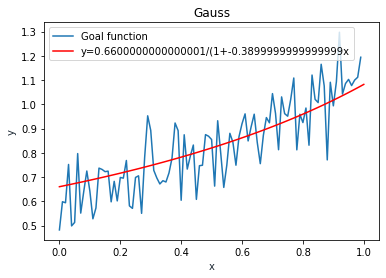

In [27]:
t = np.arange(0.0, 1.0, 0.01)

fig, ax = plt.subplots()
ax.plot(t, y_k,label='Goal function')
ax.legend()
ax.set(xlabel='x', ylabel='y',
       title='f')
ax.grid()

print(res[0])
x = np.linspace(0,1,100)
y = rational(res[0])
plt.plot(x, y, '-r', label=f'y={res[0][0]}/(1+{res[0][1]}x')
plt.title('Gauss')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()